Imports

In [24]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
#para visuzaliar as imagens usaremos o matplotlib, usaremos pyplot para ver imagens
import matplotlib.pyplot as plt
import numpy as np


Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist


Extração dos dados

In [3]:

# extraindo imagens da tupla retornada pelo datasets do keras
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

Exploração dos dados

In [4]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape # saber a quantidade e tamanho as imagens
len(identificacoes_treino)
len(identificacoes_teste)

identificacoes_treino.min()
identificacoes_treino.max()


9

Criando a camada 0

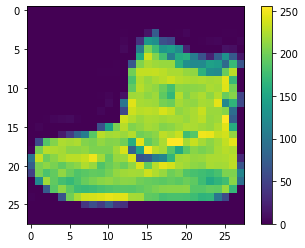

In [5]:
total_de_classificacoes = identificacoes_treino.max() - identificacoes_treino.min() + 1
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']
'''
plt.imshow(imagens_treino[0]) # visualizando o primeiro item da lista de imagens de treino
plt.title(identificacoes_treino[0])

for imagem in range(total_de_classificacoes):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()

Fazendo uma transformação nas imagens de treino

In [6]:
imagens_treino = imagens_treino/float(255) # normalização

In [20]:
  # criando um modelo dentro de uma camada sequencial
  # modelo de duas camadas, camadas 0, 1 e 2
  modelo = keras.Sequential([
      keras.layers.Flatten(input_shape = (28,28)), # camada 0
      keras.layers.Dense(256, activation=tensorflow.nn.relu),
      keras.layers.Dropout(0.2), #processamento usando a função relu do tensorflow
      keras.layers.Dense(10, activation=tensorflow.nn.softmax) #saida informando o numero da camada de saída e usando a função softmax do tensorflow
    ])
    

treinando o modelo

In [21]:
# compilação do modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5259 - accuracy: 0.8135 - val_loss: 0.4251 - val_accuracy: 0.8407
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3977 - accuracy: 0.8541 - val_loss: 0.3924 - val_accuracy: 0.8568
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3610 - accuracy: 0.8699 - val_loss: 0.3543 - val_accuracy: 0.8682
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3385 - accuracy: 0.8757 - val_loss: 0.3422 - val_accuracy: 0.8744
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3229 - accuracy: 0.8803 - val_loss: 0.3223 - val_accuracy: 0.8828


In [26]:
modelo.save('modelo.h5') # salvando o modelo
modelo_salvo = load_model('modelo.h5')

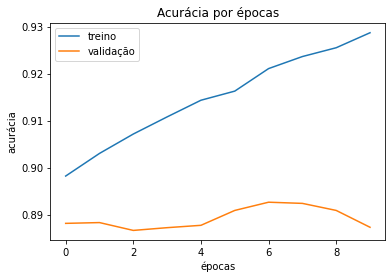

In [16]:
historico
historico.history
historico.history['accuracy']

plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])

#overfiting

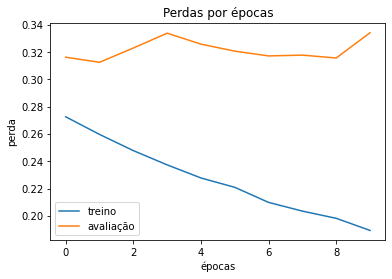

In [17]:
# montando outro gráfico
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perdas por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'avaliação'])


Realizando os testes

In [27]:
testes = modelo.predict(imagens_teste)
#testes[0] # devolve um array com 10 posições float
np.argmax(testes[0])
print('resultado do teste >>> ', np.argmax(testes[1]))
print('número de imagem de teste >>> ', identificacoes_teste[1])

# declarando testes com o modelo salvo
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado do modelo salvo >>> ', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste >>> ', np.argmax(testes_modelo_salvo[1]))

resultado do teste >>>  2
número de imagem de teste >>>  2
resultado do modelo salvo >>>  2
número da imagem de teste >>>  2


Checando os acertos

In [11]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print("perda do teste >>> ", perda_teste)
print('acuracia do test >>> ', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 57.2339 - accuracy: 0.8582
perda do teste >>>  57.233863830566406
acuracia do test >>>  0.8582000136375427
